In [4]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [14]:
df = pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [15]:
df.shape

(10000, 14)

In [16]:
#Dropping the stab column
df = df.drop('stab',axis=1)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [17]:
df.shape

(10000, 13)

In [18]:
#Converting stable and unstable classes in 'stabf' into 1 and 0 respectively
df['stabf'] = [0 if datapoint == 'unstable' else 1 for datapoint in df['stabf']]
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0


In [9]:
target = df['stabf']
predictors = df.drop('stabf', axis = 1)

In [39]:
set(target)

{0, 1}

In [11]:
#Splitting the data into train and test sets 
X_train,X_test,y_train,y_test = train_test_split(predictors, target, train_size=0.8, random_state=1)
#transforming the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## QUESTION 5

In [20]:
xgb = XGBClassifier()
model = xgb.fit(X_train,y_train)
model.score(X_test,y_test)

[13:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9455

## QUESTION6

In [22]:
lgb = LGBMClassifier()
model = lgb.fit(X_train,y_train)
model.score(X_test,y_test)

0.9395

## QUESTION 8

In [24]:
precision = (255)/(255+45)
recall = (255)/(255+1380)
f1 = (2*precision*recall)/(precision+recall)
f1

0.2635658914728682

## QUESTION 9

In [28]:
xtc = ExtraTreeClassifier()
model = xtc.fit(X_train,y_train)
model.score(X_test,y_test)

0.763

In [37]:
from sklearn.model_selection import RandomizedSearchCV
#N_estimators = [500,1000,300,100]
min_samples_split = [2,5,7]
min_samples_leaf = [8,6,4]
max_features = ['log2','Auto',None]
random_grid = {
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               }
xtc_random = RandomizedSearchCV(estimator = xtc, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1,random_state = 1, param_distributions = random_grid)

In [38]:
xtc_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\7people\.conda\envs\machineLearning\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\7people\.conda\envs\machineLearning\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\7people\.conda\envs\machineLearning\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\7people\.conda\envs\machineLearning\lib\site-packages\sklearn\tree\_classes.py", line 281, in fit
    raise ValueError(
V

RandomizedSearchCV(cv=5, estimator=ExtraTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_features': ['log2', 'Auto', None],
                                        'min_samples_leaf': [8, 6, 4],
                                        'min_samples_split': [2, 5, 7]},
                   random_state=1, scoring='accuracy', verbose=1)

In [40]:
xtc_random.best_score_

0.8398749999999999

## QUESTION 11

In [41]:
xtc_random.best_params_

{'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': None}

## QUESTION 12

In [27]:
rf = RandomForestClassifier()
model = rf.fit(X_train,y_train)
model.score(X_test,y_test)

0.9245

## QUESTION 14

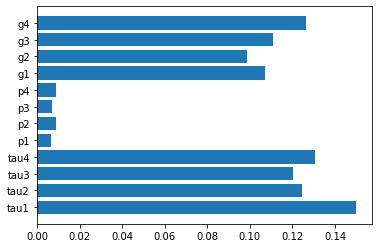

In [45]:
xtc = ExtraTreeClassifier(min_samples_split=2,min_samples_leaf=6,max_features=None)
model = xtc.fit(X_train,y_train)
impt_features = model.feature_importances_
cols=list(predictors.columns)
#Checking the most relevant features
plt.barh(range(12),impt_features,align='center')
plt.yticks(np.arange(12),labels=cols)
plt.show()